<a href="https://colab.research.google.com/github/cindykhris/SummerInternship2020/blob/master/SummerInternship2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pine Biotech Summer Reasearch

**Cindy Pino**


Abstract: In this study, we will analyze the gene expression differnt coronaviruses (CoVs) infections to determine how each virus differs when causing a disease. Here, we focuses the analysis on samples from SARS-CoV-1, MERS, and SARS-CoV-2. 
The raw sequence data (fastq files) for the SARS-CoV-1 and MERS infections were downloaded from GEO [GSE56192](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE56192), including their corresponding Mock-treated controls). The raw sequence data (fastq files) for the SARS-CoV-2 infections were downloaded from GEO ([GSE147507](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE147507)), including their corresponding Mock-treated controls). 

In this Jupyter notebook, I will use both R and Python to analyze three viruses: MERS, SARS-CoV-1, amd SARS-CoV-2

##Using R and Python in the same Notebook
First, let's active R magic. Don't forget to use %%R before running a R code 


---

In [73]:
#active R magic
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


##Import all the folders we will need for this files (R and Python)

###Python

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###R

In [ ]:
%%R
# Example package installation and plotting
install.packages("ggplot2")
ggplot2::ggplot(mtcars, ggplot2::aes(x = am, y = disp)) + ggplot2::geom_point()

In [ ]:
%%R
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("DESeq2")

In [ ]:
%%R
install.packages('EnhancedVolcano',lib = "/usr/lib/R/library")
library(EnhancedVolcano)

In [ ]:
%%R

install.packages('tidyverse',lib = "/usr/lib/R/library")

In [ ]:
%%R
install.packages("tidyverse")

In [ ]:
%%R
install.packages('dplyr', lib = "/usr/lib/R/library")

In [31]:
%%R
library(dplyr)


In [8]:
%%R
install.packages('ggplot',lib = "/usr/lib/R/library")



## SARS-CoV
Severe Acute Respiratory Syndrom Coronavirus (SARS-CoV) was first identified in 20013 (WHO). 

**Pipeline Workflow**



*   PreProcessing
    
      * PCR clean - to remove duplicates from the PCR run  thus reducing redundancy. 
      * Trimmomatic - removes adapter sequences
*   Mapping 
      * Bowtie-2t
* Quantification 

    * RSEM -  Fragment Per Kilobase of transcript per Million mapped reads  for Paired-End Reads







### Upload and clean the file 
The dataset contains the ene expression of SARS and Mocks samples. 

* log transformation and noralization
* filter out genes with very low expression (indistinguishable from noise
* RNA-seq visualization 
    * histagram, boxplot, heatmap 

It is not practical to try and visualize all genes, we have to reduce the complexity (or dimensionality) of this data. 

In [126]:
%%R
df = read.table('drive/My Drive/SummerResearch/DESeq_SARS_expression_genes_FPKM.txt',skip = 1, header = TRUE)
head(df,2)

  ENSG00000000003.13 X14.00 X14.17 X14.05 X13.24 X15.31 X14.33 X12.93 X13.14
1 ENSG00000000419.11  42.43  41.34  51.64  50.84  42.00  42.58  59.62  59.73
2 ENSG00000000457.12   3.07   2.84   2.63   2.63   2.88   3.25   2.65   2.85
  X13.07 X13.86 X12.87 X12.67
1  51.21  50.55  56.24  55.60
2   2.65   2.95   2.65   2.59


In [127]:
%%R
# use glimse to quickly look at the column names and data type
glimpse(df)

Rows: 14,716
Columns: 13
$ ENSG00000000003.13 <fct> ENSG00000000419.11, ENSG00000000457.12, ENSG000000…
$ X14.00             <dbl> 42.43, 3.07, 4.94, 10.20, 54.82, 17.99, 11.58, 4.4…
$ X14.17             <dbl> 41.34, 2.84, 4.73, 9.78, 54.97, 16.22, 10.94, 5.45…
$ X14.05             <dbl> 51.64, 2.63, 2.81, 10.18, 48.83, 13.19, 7.88, 5.30…
$ X13.24             <dbl> 50.84, 2.63, 2.87, 8.82, 47.51, 14.25, 8.54, 4.81,…
$ X15.31             <dbl> 42.00, 2.88, 4.31, 8.38, 59.92, 16.19, 10.65, 5.96…
$ X14.33             <dbl> 42.58, 3.25, 5.03, 8.70, 58.42, 16.71, 11.07, 4.43…
$ X12.93             <dbl> 59.62, 2.65, 4.68, 12.53, 56.85, 12.18, 10.26, 6.1…
$ X13.14             <dbl> 59.73, 2.85, 4.62, 11.47, 56.29, 13.98, 11.48, 5.5…
$ X13.07             <dbl> 51.21, 2.65, 4.51, 9.64, 55.46, 17.90, 12.24, 5.70…
$ X13.86             <dbl> 50.55, 2.95, 5.09, 11.60, 56.59, 17.57, 11.66, 5.8…
$ X12.87             <dbl> 56.24, 2.65, 5.42, 12.15, 55.98, 13.84, 12.25, 5.4…
$ X12.67             <dbl> 

In [128]:
%%R
# Cleaning the file for processing
ColNames1 <- df$id #take the column name
df = df[,-1] #take the data part - numeric values
df=as.matrix(df)

In [57]:
%%R
# filter values higher or less than #
#data = df[which(df[,2]>1),]
#data = df[which(df[,2]<1),]


Streaming output truncated to the last 5000 lines.
1476 ENSG00000092199.16  420.21  419.21  343.36  347.79  428.60  426.82  416.04
1477  ENSG00000092201.8   36.42   34.85   30.36   31.47   32.54   32.07   38.00
1478 ENSG00000092203.12   39.84   39.68   36.06   34.89   38.59   41.14   37.66
1479 ENSG00000092208.15    7.66    7.22    7.56    8.30    7.18    6.15    6.85
1481 ENSG00000092330.14   16.40   18.91   16.56   17.97   20.26   18.84   17.43
1482 ENSG00000092421.15    2.45    1.58    2.61    2.74    2.00    1.84    2.30
1483 ENSG00000092439.12    6.12    6.45    8.55    9.09    5.21    5.07    9.92
1484 ENSG00000092445.10   11.07   11.46   10.88   10.18   12.01   13.19   10.05
1485 ENSG00000092470.10    7.48    8.18    4.86    5.60    8.59    8.12    8.55
1486  ENSG00000092531.8   44.54   45.19   42.63   45.59   39.89   38.25   38.58
1487 ENSG00000092621.10  142.95  144.07  161.60  162.04  138.18  138.85  121.97
1488 ENSG00000092820.16   63.48   63.12   55.49   55.48   59.87   58.

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



   14.14   14.51
5059    4.67    6.69    7.18    6.19    5.40
5060  102.79  111.31  116.95   93.56  103.34
5061   97.58  106.91  113.75   99.23   98.08
5062   23.24   29.03   23.68   23.22   22.51
5063   19.25   21.32   26.39   19.38   17.57
5064    0.79    1.00    0.71    1.17    0.89
5065   12.47   12.72   13.30   12.64   13.24
5066    5.07    5.23    6.69    5.29    6.50
5067    1.94    1.78    1.82    1.85    1.48
5068    6.97    8.76   10.11   10.13   11.07
5069    3.88    4.85    5.17    4.14    4.68
5070    2.66    3.00    2.27    2.10    2.43
5071    2.00    1.39    2.06    2.36    2.13
5072  728.18  732.69  743.32  729.40  729.76
5073    0.84    1.54    2.15    1.67    1.69
5074    7.52    7.10    7.38    7.02    7.29
5075  104.68  122.55  126.55  105.00  109.59
5076   24.97   23.59   25.11   26.03   25.27
5077  124.34  104.94  101.89  121.74  120.62
5078    2.35    1.95    1.78    1.99    1.75
5079    2.09    1.96    1.06    2.22    1.88
5080    7.44    8.56   10.22    8.10  

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



   52.06
7933   25.52   26.16   26.63   26.58   23.42
7934   10.04   10.15   10.11    7.92    8.84
7935   39.67   35.66   31.33   41.16   45.30
7936   35.93   37.62   38.16   35.98   34.98
7937    6.87    6.84    6.73    6.76    6.82
7938  228.17  235.42  240.67  212.42  221.43
7939    1.81    3.04    1.83    1.71    2.19
7940  316.21  330.11  326.72  312.13  324.22
7941   32.04   31.12   26.77   27.84   29.38
7942   33.25   36.72   37.68   35.65   36.14
7943  248.95  211.02  214.97  236.95  237.26
7944   23.81   18.25   18.19   22.70   23.28
7945   42.72   42.65   44.94   43.88   44.64
7946    5.82    4.35    4.26    6.21    6.05
7947   21.73   19.35   22.88   20.93   22.30
 [ reached 'max' / getOption("max.print") -- omitted 5425 rows ]


In [ ]:
%%R
#remove a header 
names(df) <- NULL


In [ ]:
#remove NAs from dataset
cleandata <- na.exclude(df)

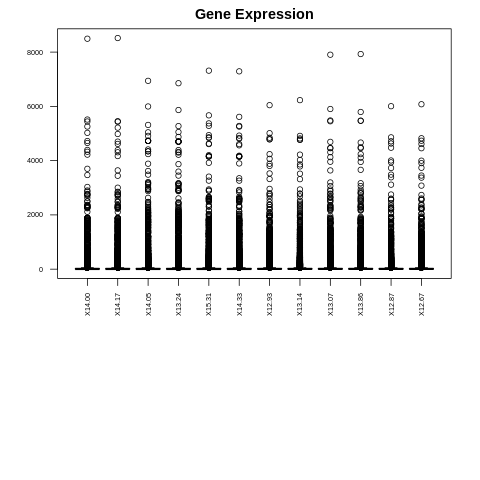

In [130]:
%%R
#Basic Settings:

colors <- c(rep('red',6),rep('blue',3),rep('green',2),rep('gray',2))
par(mar=c(14,4,2,2))
boxplot(df, main="Gene Expression",las = 2, cex.axis=0.6)


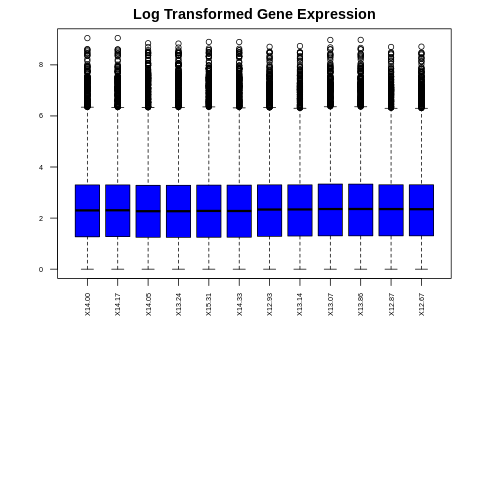

In [131]:
%%R
#Log transformation
logdata <- log(df+1)
par(mar=c(14,4,2,2))
boxplot(logdata, main="Log Transformed Gene Expression", col = 'blue', las = 2, cex.axis=0.6)


In [ ]:
%%R
#Descriptive statistics
summary(df)

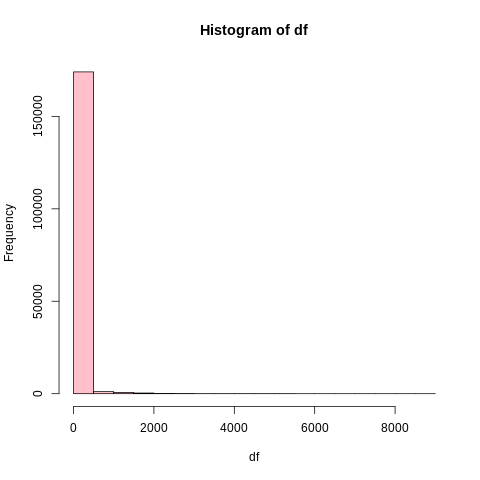

In [132]:
%%R
hist(df, col='pink')


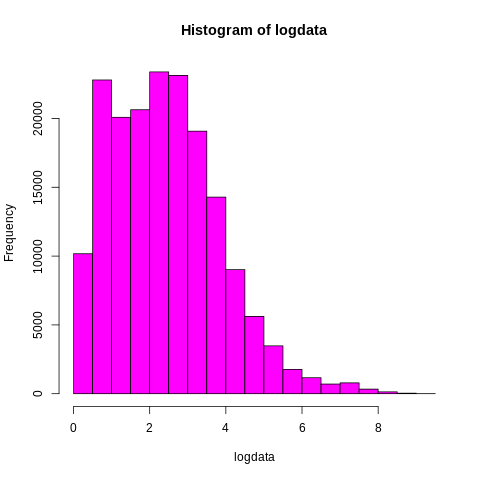

In [133]:
%%R
hist(logdata, col='magenta')

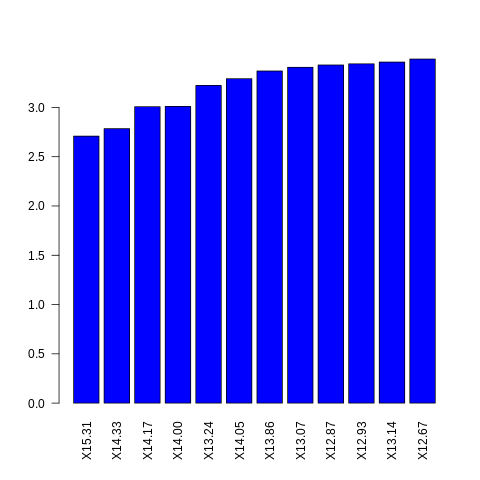

In [134]:
%%R
barplot(sort(logdata[100,]), col = "blue", main = ColNames1[2], font.axis=1, cex.axis=1, las=2)


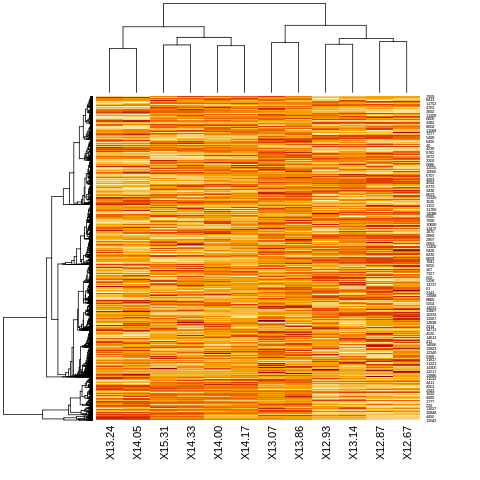

In [135]:
%%R
heatmap(logdata)

### Principal Component Analysis

In [ ]:
%%R
install.packages("ggplot2")

In [ ]:
%%R
install.packages("magrittr")

In [ ]:
%%R
install.packages("ggpubr")

In [ ]:
%%R
install.packages("ggfortify")

In [ ]:
%%R
install.packages("cluster")

In [111]:
%%R

options(echo=FALSE) 
args <- commandArgs(trailingOnly = TRUE)

In [112]:
%%R
args [1] = ('drive/My Drive/SummerResearch/DESeq_SARS_expression_genes_FPKM.txt') #input file
args [2] = 'YES' #transpose (YES/NO) 
args [3] = 'YES' #center (YES/NO) 
args [4] = 'YES'  #scale (YES/NO)
args [5] = 3 #number of axis to draw 

In [113]:
%%R
MaxGroupsForLegend <- 50

In [116]:
%%R
#Read dataframe
data <- read.table (args [1], header = TRUE, row.names=1, stringsAsFactors=FALSE, check.names=FALSE)


In [118]:
%%R
#Prepare dataframe
if (args [2] == "YES") {
  if ((rownames (data)[1] ==  "group") || (rownames (data)[1] ==  "Group") || (rownames (data)[1] ==  "GROUP")) {
    Group = t (data [1,])
    cnames =colnames (data)
    data <- read.table (args[1], header = FALSE, row.names=1, skip=2, stringsAsFactors=FALSE, check.names=FALSE)
    colnames (data) = cnames        
    
    data = data.frame (Group, t (data))
  } else {
    data = t (data)
  }
}
if ((colnames (data) [1] == "group") || (colnames (data) [1] == "Group") || (colnames (data) [1] == "GROUP")) {
  Group = data [, 1]
  data = data [, -1]
  data = transform (data, as.numeric)
  LegendTitle="Group"
} else {
  Group = rownames (data)
  LegendTitle="Sample"
}
Group = as.factor (Group)

          

In [119]:
%%R

#Parse centering and scaling arguments
if(args [3] == "YES") {
  cent = TRUE
} else {
  cent = FALSE
}
if(args [4] == "YES") {
  sc = TRUE
} else {
  sc = FALSE
}

In [120]:
%%R
#Main computation - perform PCA
pca <- prcomp (data, scale. = sc, center=cent)
pca_res = data.frame (pca$x, Group) 

In [121]:
%%R

#Draw PCA plots
todraw = as.numeric (args[5])
if (todraw < 2) {
  todraw = 2
}
if (todraw > length (colnames (pca$x))) {
  todraw = length (colnames (pca$x))
}

pdf ("PCA_plots.pdf")


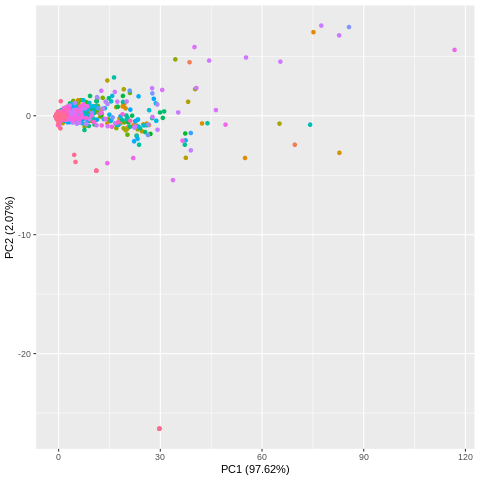

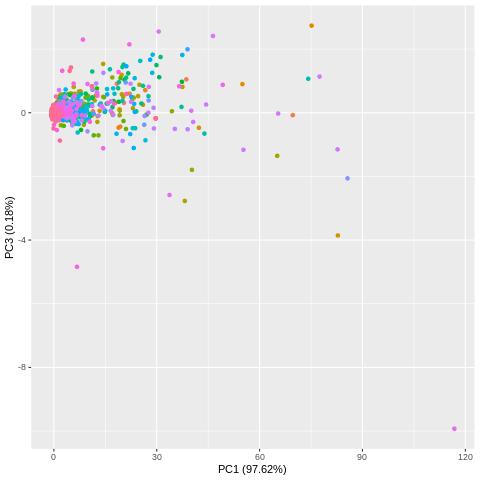

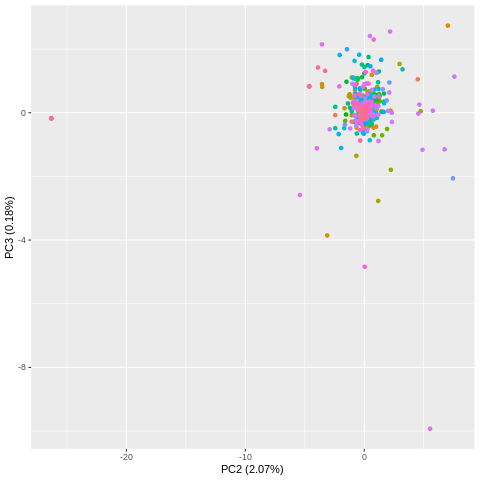

In [122]:
%%R
# Add variation percent to PC names
ei = pca$sdev^2
vp = ei / sum(ei) * 100.0
prevnames <- colnames (pca$x)
newnames <- paste (colnames (pca$x), "(", round (vp, digits=2), "%)", sep="")
newnames_prt <- paste (colnames (pca$x), " (", round (vp, digits=2), "%)", sep="")


if (length (unique (Group)) <= MaxGroupsForLegend) {
  legend_pos <- "bottom"
} else {
  legend_pos <- "none"
}

for (i in 1:(todraw-1)) {
  for (j in (i+1):todraw) {
    plot = ggplot (data.frame (pca$x), aes_string(x=colnames (pca$x) [i], y=colnames(pca$x)[j], colour = "Group")) + geom_point() + labs(x=newnames_prt[i], y=newnames_prt[j], color=LegendTitle) + theme(legend.position=legend_pos)
    print (plot)
  }
}

tmp <- dev.off ()

In [123]:
%%R
#Save PCA table
colnames (pca$x) <- newnames
cat ("Obj\t", file="PCA_table.txt", append=FALSE)
write.table(pca$x, file="PCA_table.txt", row.names=TRUE, col.names=TRUE, sep="\t", quote=FALSE, append=TRUE)
colnames (pca$x) <- prevnames


In [124]:
%%R
#Save some additional information
cat ("Component\t", file="PCA_additional.txt", append=FALSE)
cat (colnames(pca$x), file="PCA_additional.txt", append=TRUE, sep="\t")
cat ("\n", file="PCA_additional.txt", append=TRUE)

cat ("SDev\t", file="PCA_additional.txt", append=TRUE)
cat (pca$sdev, file="PCA_additional.txt", append=TRUE, sep="\t")
cat ("\n", file="PCA_additional.txt", append=TRUE)

cat ("VariancePerccent\t", file="PCA_additional.txt", append=TRUE)
cat (vp, file="PCA_additional.txt", append=TRUE, sep="\t")
cat ("\n", file="PCA_additional.txt", append=TRUE)

cat ("CumulVariancePerccent\t", file="PCA_additional.txt", append=TRUE)
cat (cumsum(vp), file="PCA_additional.txt", append=TRUE, sep="\t")
cat ("\n\n", file="PCA_additional.txt", append=TRUE)


cnames <- row.names(pca$rotation)
cent_d <- row.names(pca$rotation)
shift_d <- row.names(pca$rotation)
if (cent == FALSE) {
  cent_d [] <- "NA(Centering=FALSE)"
} else {
  cent_d <- pca$center
}
if (sc == FALSE) {
  shift_d <- "NA(Scaling=FALSE)"
} else {
  shift_d <- pca$scale
}

out_t <- cbind (cnames, cent_d, shift_d)
colnames (out_t) <- c ("Feature", "CenteringShift", "ScalingCoefficient")

write.table (out_t, file="PCA_additional.txt", col.names=TRUE, row.names=FALSE, append=TRUE, sep="\t")

